# <font color=darkgreen> Building a DNN and CNN on MNIST</font>

### <font color=deeppink> Import our essential libraries </font>

In [1]:
import sys
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# %matplotlib inline

### <font color=deeppink> Loading the MNIST dataset </font>

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Display the dimensions of the data
# Train images - axes, shape, datatype
print("Axes = {}".format(train_images.ndim), #axes
'\nShape = {}'.format(train_images.shape), #shape
'\nDataType = {}'.format(train_images.dtype)) #datatype        

Axes = 3 
Shape = (60000, 28, 28) 
DataType = uint8


In [4]:
# Display the dimensions of the data
# Test images - axes, shape, datatype
print("Axes = {}".format(test_images.ndim), #axes
'\nShape = {}'.format(test_images.shape), #shape
'\nDataType = {}'.format(test_images.dtype)) #datatype

Axes = 3 
Shape = (10000, 28, 28) 
DataType = uint8


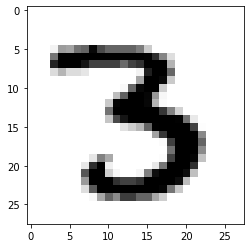

In [5]:
# Display a sample digit from the dataset
digit = train_images[12]
plt.imshow(digit, cmap='binary')

In [6]:
# Check the label for that sample digit
# print('Label for train_image[12] is = ', )
print('Label for train_image[12] is = ', train_labels[12])

Label for train_image[12] is =  3


In [7]:
# Print that sample digit and its shape to see the gray levels (or pixels)
print(digit)
print(digit.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  12  99  91 142 155 246 182 155 155 155 155 131  52   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 138 254 254 254 254 254 254 254 254 254 254 254 252 210 122
   33   0   0   0   0   0   0   0   0   0]
 [  0   0   0 220 254 254 254 235 189 189 189 189 150 189 205 254 254 254
   75   0   0   0   0   0   0   0   0   0]
 [  0   0   0  35  74  35  35  25   0   0   0   0   0   0  13 22

In [8]:
# Print the length of the train_images, the number of samples, height and width
print(len(train_images))
print(train_images.shape)
print("No. of samples = ", train_images.shape[0])
print("Height of the image = ", train_images.shape[1])
print("Width of the image = ", train_images.shape[2])
print(train_images[0].astype('int').dtype)

60000
(60000, 28, 28)
No. of samples =  60000
Height of the image =  28
Width of the image =  28
int64


### <font color=deeppink>Dataset preparation </font>

In [9]:
# Prepare the dataset for the neural network, we need a 1-D tensor with normalized values between 0 to 1
train_images2 = train_images.reshape(60000, 28 * 28)
train_images2 = train_images2 / 255 # or train_images.astype('float32') / 255
print(train_images2.shape)
# print(train_images2[12])
print(train_images2.dtype)

(60000, 784)
float64


In [10]:
# Repeat the same for the test dataset
test_images2 = test_images.reshape(10000, 28 * 28)
test_images2 = test_images2 / 255
print(test_images2.shape)
print(test_images2.dtype)
# print(test_images2[12])

(10000, 784)
float64


### <font color=deeppink> Building the model </font>

In [11]:
# We need a Sequential model with 2 Dense layers, one with 512 neurons and the other with 784 neurons (num_classes)
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
model = Sequential([
layers.Dense(512, activation='relu', name='Dense_layer_1', input_shape=(784, )),
layers.Dense(10, activation='softmax', name='Dense_layer_2')
])
print(model.summary())

2022-03-28 11:56:32.960913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_layer_1 (Dense)        (None, 512)               401920    
_________________________________________________________________
Dense_layer_2 (Dense)        (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


2022-03-28 11:56:33.067773: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-28 11:56:33.068452: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-28 11:56:33.069573: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-28 11:56:33.070646: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

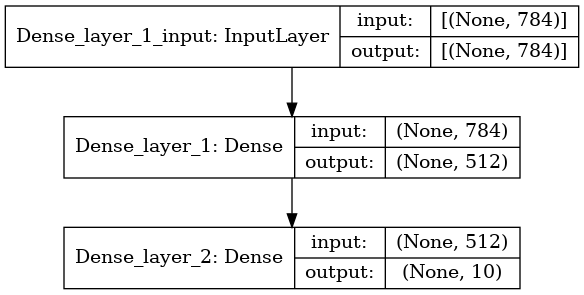

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

# Can you see the shapes?

In [13]:
tf.keras.utils.plot_model?

### <font color=deeppink> Compiling the model </font>

In [14]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

### <font color=deeppink> Training the model </font>

In [15]:
# Finally train the model on the train_images and train_labels
model.fit(train_images2, train_labels, epochs=5, batch_size=128)

2022-03-28 11:56:37.171838: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.2574 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1025 - accuracy: 0.9700
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0690 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0499 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.9888


In [16]:
model.fit?


### <font color=deeppink> Testing the model </font>

In [17]:
(loss_result, acc_result) = model.evaluate(test_images2, test_labels)
print("Accuracy = {}".format(acc_result),
"\nLoss = {}".format(loss_result))

313/313 [==============================] - 1s 2ms/step - loss: 0.0660 - accuracy: 0.9810
Accuracy = 0.9810000061988831 
Loss = 0.06602083891630173


In [18]:
# Let us predict and see
y_pred = model.predict(np.expand_dims(test_images2[12], axis=0))

def max_ypred(y_pred):
    max_ypred2 = np.max(y_pred)
    for i,n in enumerate(y_pred[0]):
        if n == max_ypred2:
            return i
print("Predicted probablities = ",y_pred)
print("Y_pred = {} \t Y_true ={}".format(max_ypred(y_pred), test_labels[12]))


Predicted probablities =  [[5.5949240e-10 2.3649221e-10 8.3853152e-08 2.0809961e-05 3.4099685e-05
  5.3384397e-06 1.2726692e-10 2.0920977e-05 6.4487870e-07 9.9991810e-01]]
Y_pred = 9 	 Y_true =9


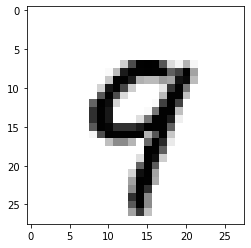

In [19]:
plt.imshow(test_images[12].reshape(28, 28), cmap='binary')

### <font color=deeppink> Validating the model on the test dataset </font>

In [20]:
# Rebuild the model to avoid overfitting it, since we want to retrain the model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(512, activation='relu', name='Dense1'),
tf.keras.layers.Dense(10, activation='softmax', name='Dense2')
])
# Recompile the model
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [21]:
# Train the model this time with the validation data
model.fit(train_images2, train_labels, epochs=10, batch_size=128, validation_data=(test_images2, test_labels))



Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2549 - accuracy: 0.9260 - val_loss: 0.1301 - val_accuracy: 0.9614
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1039 - accuracy: 0.9693 - val_loss: 0.0907 - val_accuracy: 0.9722
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9800 - val_loss: 0.0772 - val_accuracy: 0.9762
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0491 - accuracy: 0.9848 - val_loss: 0.0751 - val_accuracy: 0.9765
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0375 - accuracy: 0.9889 - val_loss: 0.0662 - val_accuracy: 0.9792
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.0713 - val_accuracy: 0.9795
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.0684 - val_accuracy: 0.9801
Epoch 

### <font color=deeppink> Plotting the training vs. validation accuracy </font>

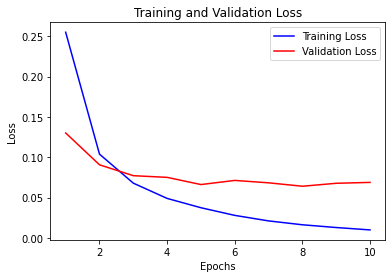

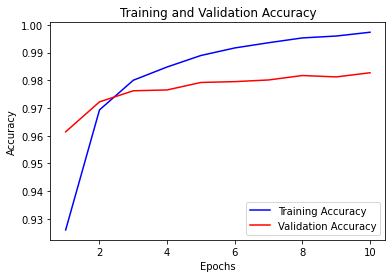

In [22]:
history_dict = model.history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot.png')
plt.show()

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('acc_plot.png')
plt.show()

### <font color=deeppink> Let us predict and see </font>

Predicted probablities =  [[2.91599362e-12 1.62025637e-04 2.80670815e-06 1.03592074e-05
  1.00421102e-10 3.19725323e-11 1.04982365e-14 9.99770701e-01
  4.04527855e-05 1.36081571e-05]]
Y_pred = 7 	 Y_true =7


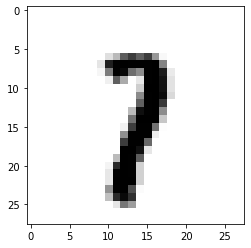

In [23]:
# Let us predict and see
y_pred = model.predict(np.expand_dims(test_images2[111], axis=0))

def max_ypred(y_pred):
    max_ypred2 = np.max(y_pred)
    for i,n in enumerate(y_pred[0]):
        if n == max_ypred2:
            return i
print("Predicted probablities = ",y_pred)
print("Y_pred = {} \t Y_true ={}".format(max_ypred(y_pred), test_labels[111]))

plt.imshow(test_images2[111].reshape(28, 28), cmap='binary')

# <font color=darkblue> Experimenting with different optimizers and observe the results </font>

1. Repeat the steps for building, compiling, training and testing the model.
2. Replace the optimizer 'rmsprop' with 'sgd', 'adam', 'adagrad' and note the results.
3. For SGD with momentum, use optimizer=tf.keras.optimizers.SGD(momentum=0.1) 


### <font color=deeppink> Building the model </font>

In [24]:
# Build the model again 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
model1 = Sequential([
layers.Dense(512, activation='relu', name='Dense_layer_1', input_shape=(784, )),
layers.Dense(10, activation='softmax', name='Dense_layer_2')
])
print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 512)               401920    
_________________________________________________________________
Dense2 (Dense)               (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


### <font color=deeppink> Compiling the model </font>

In [25]:
# Compile the model 
# Here we shall specify the optimizer, the loss function and the metrics the model needs to focus on
model1.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

### <font color=deeppink> Training the model </font>

In [26]:
# Finally train the model on the train_images and train_labels
model1.fit(train_images2, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.0990 - accuracy: 0.7619
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5177 - accuracy: 0.8746
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4174 - accuracy: 0.8903
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3711 - accuracy: 0.8994
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3423 - accuracy: 0.9061


### <font color=deeppink> Testing the model </font>

In [27]:
(loss_result, acc_result) = model1.evaluate(test_images2, test_labels)
print("Accuracy = {}".format(acc_result),
"\nLoss = {}".format(loss_result))

313/313 [==============================] - 1s 2ms/step - loss: 0.3154 - accuracy: 0.9133
Accuracy = 0.9132999777793884 
Loss = 0.3154411315917969


In [28]:
# Let us predict and see
# Let us predict and see
y_pred = model1.predict(np.expand_dims(test_images2[12], axis=0))

def max_ypred(y_pred):
    max_ypred2 = np.max(y_pred)
    for i,n in enumerate(y_pred[0]):
        if n == max_ypred2:
            return i
print("Predicted probablities = ",y_pred)
print("Y_pred = {} \t Y_true ={}".format(max_ypred(y_pred), test_labels[12]))



Predicted probablities =  [[1.8888959e-04 1.1434885e-05 2.2346362e-04 2.7804030e-04 6.2375881e-02
  8.6971489e-04 2.0288659e-04 3.1705834e-02 3.1588466e-03 9.0098506e-01]]
Y_pred = 9 	 Y_true =9


In [29]:

model2 = Sequential([
layers.Dense(512, activation='relu', name='Dense_layer_1', input_shape=(784, )),
layers.Dense(10, activation='softmax', name='Dense_layer_2')
])
print(model2.summary())

model2.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


model2.fit(train_images2, train_labels, epochs=5, batch_size=128)

(loss_result, acc_result) = model2.evaluate(test_images2, test_labels)
print("Accuracy = {}".format(acc_result),
"\nLoss = {}".format(loss_result))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_layer_1 (Dense)        (None, 512)               401920    
_________________________________________________________________
Dense_layer_2 (Dense)        (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2602 - accuracy: 0.9264
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1075 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0493 - accuracy: 0.9856
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9783
Accuracy =

In [30]:

model3 = Sequential([
layers.Dense(512, activation='relu', name='Dense_layer_1', input_shape=(784, )),
layers.Dense(10, activation='softmax', name='Dense_layer_2')
])
print(model3.summary())

model3.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.1),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


model3.fit(train_images2, train_labels, epochs=5, batch_size=128)

(loss_result, acc_result) = model3.evaluate(test_images2, test_labels)
print("Accuracy = {}".format(acc_result),
"\nLoss = {}".format(loss_result))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_layer_1 (Dense)        (None, 512)               401920    
_________________________________________________________________
Dense_layer_2 (Dense)        (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 1.0608 - accuracy: 0.7678
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4949 - accuracy: 0.8781
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4025 - accuracy: 0.8944
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3605 - accuracy: 0.9027
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3079 - accuracy: 0.9166
Accuracy =

In [31]:

model4 = Sequential([
layers.Dense(512, activation='relu', name='Dense_layer_1', input_shape=(784, )),
layers.Dense(10, activation='softmax', name='Dense_layer_2')
])
print(model4.summary())

model4.compile(optimizer='adagrad',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


model4.fit(train_images2, train_labels, epochs=5, batch_size=128)

(loss_result, acc_result) = model4.evaluate(test_images2, test_labels)
print("Accuracy = {}".format(acc_result),
"\nLoss = {}".format(loss_result))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_layer_1 (Dense)        (None, 512)               401920    
_________________________________________________________________
Dense_layer_2 (Dense)        (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.6680 - accuracy: 0.6107
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.9986 - accuracy: 0.8141
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7493 - accuracy: 0.8471
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6286 - accuracy: 0.8626
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5083 - accuracy: 0.8849
Accuracy =

# <font color=blue>Results</font>


$$
\begin{bmatrix}
    \hline
    \mathtt{optimizer} & \mathtt{test~accuracy} & \mathtt{test~loss} \\
    \hline 
    rmsprop & 0.9807 & 0.064 \\  
    sgd & 0.9107 & 0.31 \\ 
    sgd~momentum & 0.9164 & 0.3065 \\
    adam & 0.9789 & 0.06533 \\
    adagrad & 0.8827 & 0.5103 \\ 
    \hline
\end{bmatrix}
$$



# <font color=darkgreen>Convolutional Neural Network</font>

In [32]:
# Build a CNN model for the dataset
# We need to prepare the dataset differently now
print(train_images.shape)
# But we need to add an extra dimension for a grayscale image, depth = 1

train_images3 = train_images.reshape(60000, 28, 28, 1)
train_images3 = train_images3 / 255

# Print the shape of the image and display it
print(train_images3.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [33]:
# Repeat this for the test images
test_images3 = test_images.reshape(10000, 28, 28, 1)
test_images3 = test_images3 / 255
# Print the shape of the image and display it
print(test_images3.shape)

(10000, 28, 28, 1)


In [34]:
# Build the CNN model with 3 convolutional layers, 2 max pooling layers and 2 Dense layers
model_cnn = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(pool_size=2),
tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=2),
tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])
model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 512)              

In [35]:
# Compile the model as usual
model_cnn.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [36]:
# Train the model
history = model_cnn.fit(train_images3, train_labels, epochs=5, batch_size=128, validation_data=(test_images3, test_labels))

Epoch 1/5


2022-03-28 11:57:55.405742: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


469/469 [==============================] - 8s 5ms/step - loss: 0.1916 - accuracy: 0.9401 - val_loss: 0.0616 - val_accuracy: 0.9814
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0459 - accuracy: 0.9851 - val_loss: 0.0398 - val_accuracy: 0.9877
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.0385 - val_accuracy: 0.9889
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0292 - val_accuracy: 0.9909
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.0270 - val_accuracy: 0.9914


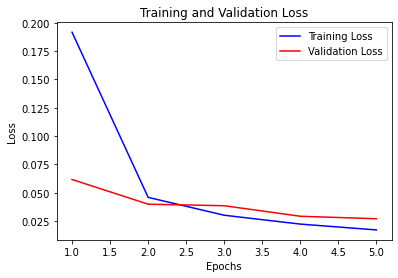

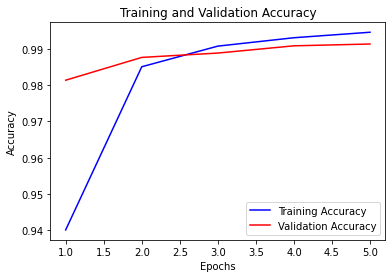

In [37]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('cnn_loss_plot.png')
plt.show()

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('cnn_acc_plot.png')
plt.show()